## Collab | Wordcloud from the 'brasilivre' subreddit

In [ ]:
!pip install nltk

In [ ]:
!pip install db-sqlite3

In [15]:
from google.colab import drive
import pandas as pd
import nltk
import sqlite3
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nltk.download('stopwords')

In [8]:
db_path = os.path.join('/content/drive/MyDrive/projetos-dev', 'posts.db')

In [16]:
conn = sqlite3.connect(db_path)
df = pd.read_sql_query('SELECT ts, title, created_at FROM posts ORDER BY created_at DESC', conn)
conn.close()
display(df)

,ts,title,created_at
0,1728423628,Pessoal exarcebado brigando para defender o si...,2024-10-08 21:40:28.000000
1,1728421881,o povo brasileiro é como uma criança gritando ...,2024-10-08 21:11:21.000000
2,1728421172,"`nic.br`, a autarquia estatal que coordena o `...",2024-10-08 20:59:32.000000
3,1728421053,Eu AMO o WD-40!,2024-10-08 20:57:33.000000
4,1728420716,Moraes autoriza rede social X a voltar a opera...,2024-10-08 20:51:56.000000
...,...,...,...
286,1727833778,"Fui diagnosticado com autismo leve, em que ess...",2024-10-02 01:49:38.000000
287,1727832173,Avião de Lula pousa no México após problema té...,2024-10-02 01:22:53.000000
288,1727831919,Mensalão: a cartada final dos condenados para ...,2024-10-02 01:18:39.000000
289,1727831012,Estatismo indiano versus estatismo brasileiro,2024-10-02 01:03:32.000000


In [17]:
word_string=" ".join(df['title'].str.lower())

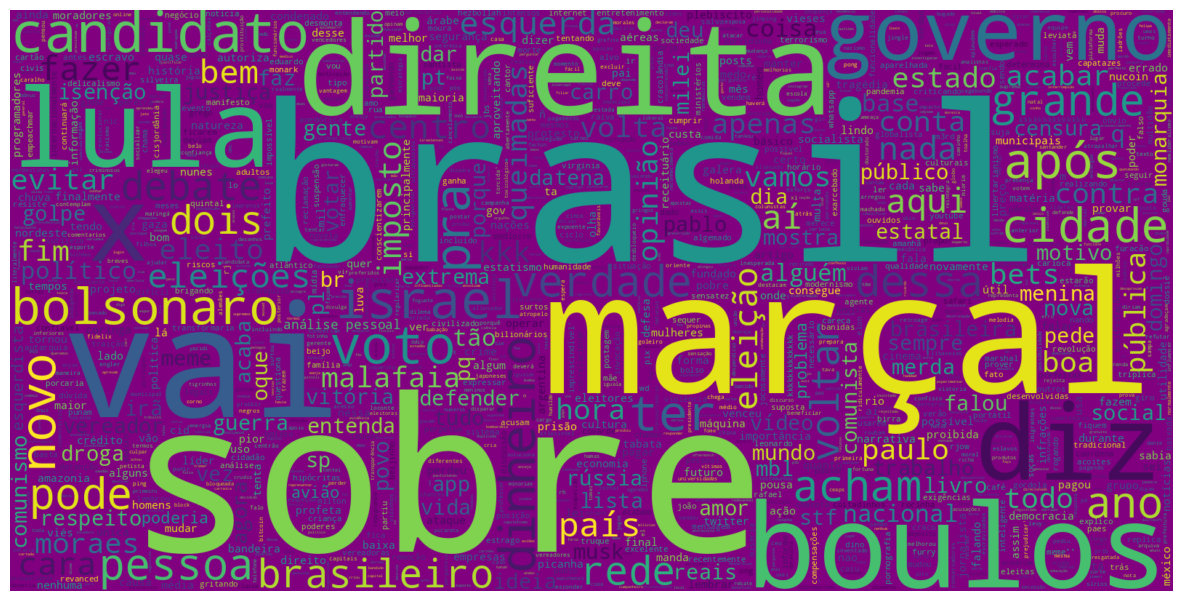

In [18]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

portuguese_stopwords = set(stopwords.words('portuguese'))

custom_stopwords = STOPWORDS.union(portuguese_stopwords)

plt.figure(figsize=(15, 15))
wc = WordCloud(
    background_color="purple",
    stopwords=custom_stopwords,
    max_words=2000,
    max_font_size=300,
    width=1600,
    height=800
)
wc.generate(word_string)

plt.imshow(wc.recolor(colormap='viridis', random_state=17), interpolation="bilinear")
plt.axis('off')
plt.show()